In [5]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("Data.csv", index_col = 0)
df.head()

Title  Rating  \
0  Great Culture and Company That Cares       4   
1       Shaping the Future of Mobility!       5   
2      Lots of potential- getting there       4   
3              Alright but not the best       3   
4                                 Aptiv       3   

                      Employee Status  \
0                    Current Employee   
1  Current Employee, more than 1 year   
2  Current Employee, more than 1 year   
3  Current Employee, more than 1 year   
4                    Current Employee   

                                                Pros  \
0  Not much politics and very few ego's. Everyone...   
1  Global Work Environment, Cutting Edge Technolo...   
2  A very fast paced environment - you definitely...   
3  Excellent office, good staff, good pay, good b...   
4  It is one of the leaders in the automotive ind...   

                                                Cons Date Posted  \
0  Need to focus on career growth and promoting w...   13-Jan-21   
1                      None to mention at this time.   14-Apr-21   
2  Training and coaching could be better- high ex...   22-May-21   
3  Dis organised, office politics at mid/top leve...   08-Mar-21   
4  High pressure for hitting numbers, it is more ...   07-Nov-20   

                        Employee Title Location Unnamed: 9  
0   Senior Corporate Recruiter in Troy       MI        NaN  
1            Program Manager in Dublin   Dublin        NaN  
2                        SCM in Dublin   Dublin        NaN  
3           Business Analyst in Dublin   Dublin        NaN  
4               Supply Chain in Dublin   Dublin        NaN

### Preprocessing

In [9]:
df['Pros'] = df['Pros'].astype(str)
df['Cons'] = df['Cons'].astype(str)

In [11]:
df = df[~df["Pros"].isnull()]
df = df[~df["Cons"].isnull()]


In [18]:
def combined_features(row):
    return row['Title'] + ' '+ row['Pros'] + ' '+ row['Cons']
df['all_features'] = df.apply(combined_features, axis=1)
df.head()

Title  Rating  \
0  Great Culture and Company That Cares       4   
1       Shaping the Future of Mobility!       5   
2      Lots of potential- getting there       4   
3              Alright but not the best       3   
4                                 Aptiv       3   

                      Employee Status  \
0                    Current Employee   
1  Current Employee, more than 1 year   
2  Current Employee, more than 1 year   
3  Current Employee, more than 1 year   
4                    Current Employee   

                                                Pros  \
0  Not much politics and very few ego's. Everyone...   
1  Global Work Environment, Cutting Edge Technolo...   
2  A very fast paced environment - you definitely...   
3  Excellent office, good staff, good pay, good b...   
4  It is one of the leaders in the automotive ind...   

                                                Cons Date Posted  \
0  Need to focus on career growth and promoting w...   13-Jan-21   
1                      None to mention at this time.   14-Apr-21   
2  Training and coaching could be better- high ex...   22-May-21   
3  Dis organised, office politics at mid/top leve...   08-Mar-21   
4  High pressure for hitting numbers, it is more ...   07-Nov-20   

                        Employee Title Location Unnamed: 9  \
0   Senior Corporate Recruiter in Troy       MI        NaN   
1            Program Manager in Dublin   Dublin        NaN   
2                        SCM in Dublin   Dublin        NaN   
3           Business Analyst in Dublin   Dublin        NaN   
4               Supply Chain in Dublin   Dublin        NaN   

                                        all_features  
0  Great Culture and Company That Cares Not much ...  
1  Shaping the Future of Mobility! Global Work En...  
2  Lots of potential- getting there A very fast p...  
3  Alright but not the best Excellent office, goo...  
4  Aptiv It is one of the leaders in the automoti...

### Data Analysis

In [20]:
df['review_len'] = df['all_features'].astype(str).apply(len)
df['word_count'] = df['all_features'].apply(lambda x: len(str(x).split()))

In [21]:
from textblob import TextBlob, Word, Blobber
df['polarity'] = df['all_features'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

Title  Rating  \
0  Great Culture and Company That Cares       4   
1       Shaping the Future of Mobility!       5   
2      Lots of potential- getting there       4   
3              Alright but not the best       3   
4                                 Aptiv       3   

                      Employee Status  \
0                    Current Employee   
1  Current Employee, more than 1 year   
2  Current Employee, more than 1 year   
3  Current Employee, more than 1 year   
4                    Current Employee   

                                                Pros  \
0  Not much politics and very few ego's. Everyone...   
1  Global Work Environment, Cutting Edge Technolo...   
2  A very fast paced environment - you definitely...   
3  Excellent office, good staff, good pay, good b...   
4  It is one of the leaders in the automotive ind...   

                                                Cons Date Posted  \
0  Need to focus on career growth and promoting w...   13-Jan-21   
1                      None to mention at this time.   14-Apr-21   
2  Training and coaching could be better- high ex...   22-May-21   
3  Dis organised, office politics at mid/top leve...   08-Mar-21   
4  High pressure for hitting numbers, it is more ...   07-Nov-20   

                        Employee Title Location Unnamed: 9  \
0   Senior Corporate Recruiter in Troy       MI        NaN   
1            Program Manager in Dublin   Dublin        NaN   
2                        SCM in Dublin   Dublin        NaN   
3           Business Analyst in Dublin   Dublin        NaN   
4               Supply Chain in Dublin   Dublin        NaN   

                                        all_features  review_len  word_count  \
0  Great Culture and Company That Cares Not much ...         342          58   
1  Shaping the Future of Mobility! Global Work En...         141          20   
2  Lots of potential- getting there A very fast p...         531          89   
3  Alright but not the best Excellent office, goo...         160          25   
4  Aptiv It is one of the leaders in the automoti...         300          53   

   polarity  
0  0.193286  
1 -0.025000  
2  0.188991  
3  0.616667  
4  0.100278

array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

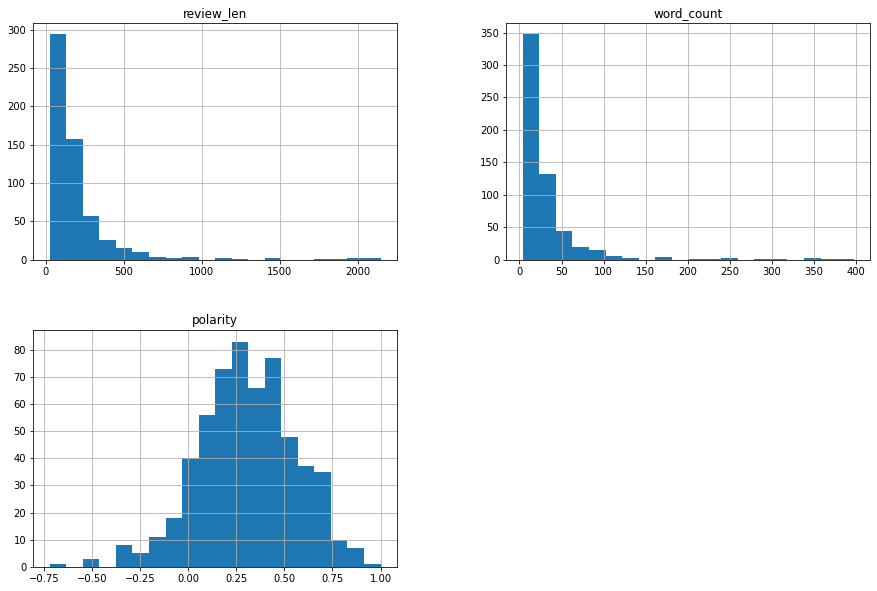

In [22]:
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

In [23]:
import matplotlib.pyplot as plt

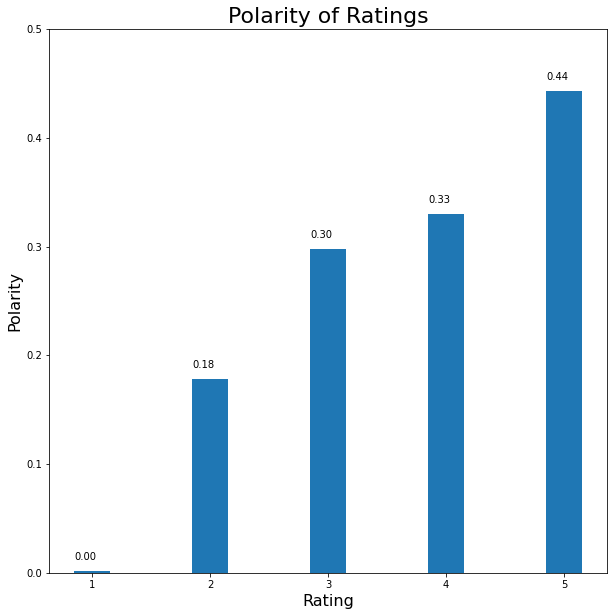

In [27]:
mean_pol = df.groupby('Rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
    
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.5)
plt.show()

In [29]:
import seaborn as sns

Rectangle(xy=(-0.4, 0), width=0.8, height=209, angle=0)
209
Rectangle(xy=(0.6, 0), width=0.8, height=145, angle=0)
145
Rectangle(xy=(1.6, 0), width=0.8, height=118, angle=0)
118
Rectangle(xy=(2.6, 0), width=0.8, height=58, angle=0)
58
Rectangle(xy=(3.6, 0), width=0.8, height=49, angle=0)
49


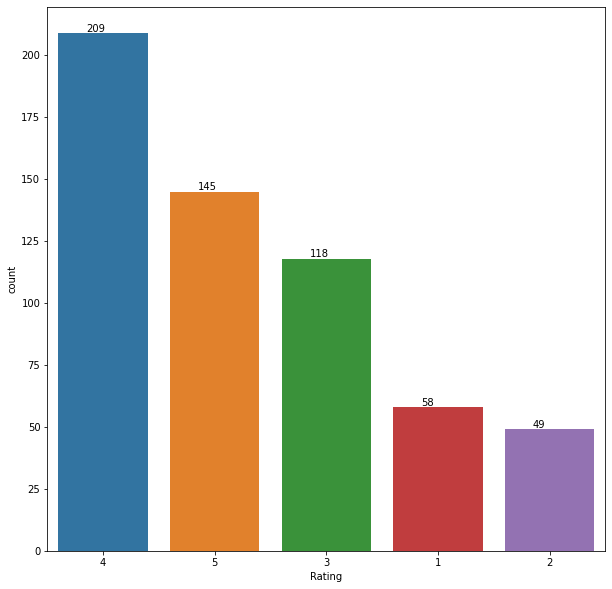

In [32]:
plt.figure(figsize=(10,10))

ax = sns.countplot(x=df['Rating'], data=df, order=df['Rating'].value_counts().index)
for p, label in zip(ax.patches, df['Rating'].value_counts()):
    print(p)
    print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

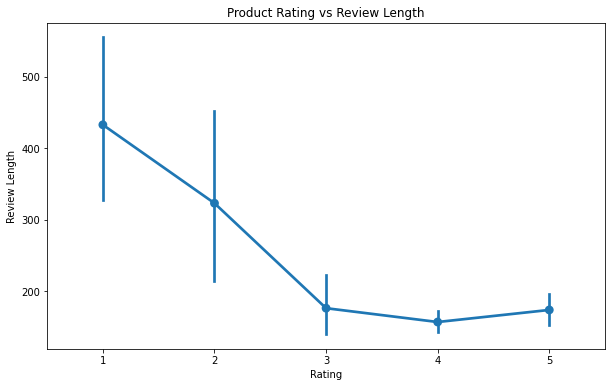

In [33]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "Rating", y = "review_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

In [39]:
mask = (df['Rating'] == 1) | (df['Rating'] == 2)
df_rating_12 = df[mask]
mask = (df['Rating'] == 4) | (df['Rating'] == 5) | (df['Rating'] == 3)
df_rating_345 = df[mask]

In [40]:
print(len(df_rating_12))
print(len(df_rating_345))

107
472
